<a href="https://colab.research.google.com/github/Hardik-Garbyal/Logo-Detection/blob/main/Scrap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pathlib
import glob
import PIL
import cv2
import seaborn
import numpy as np
from PIL import Image
from tensorflow import keras
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
trains_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/Logo_Dataset',
    # labels = 'inferred',
    label_mode ='int',
    batch_size = 32,
    image_size = (256,256)
)

Found 1505 files belonging to 2 classes.


In [ ]:
test_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/drive/MyDrive/Test',
    # labels = 'inferred',
    label_mode ='int',
    batch_size = 32,
    image_size = (256,256)
)

Found 171 files belonging to 2 classes.


In [ ]:
print(test_ds)
print(trains_ds)

<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>
<_MapDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>


In [ ]:
#Normalize
def process(image,label):
  image = tf.cast(image/255. , tf.float32)
  return image,label

trains_ds = trains_ds.map(process)
test_ds = test_ds.map(process)


In [ ]:
from keras import Sequential
from keras.layers import Dense,Conv2D, MaxPooling2D,Flatten, BatchNormalization, Dropout

In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size = (3, 3),
          padding='valid',
          input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),
                       strides=2,
                       padding ='valid'))


model.add(Conv2D(64,kernel_size = (3, 3),
          padding='valid',
          activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),
                       strides=2,
                       padding ='valid'))

model.add(Conv2D(128,kernel_size = (3, 3),
          padding='valid',
          activation ='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2),
                       strides=2,
                       padding ='valid'))

model.add(Flatten())

model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation = 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_3 (Batc  (None, 254, 254, 32)     128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_4 (Batc  (None, 125, 125, 64)     256       
 hNormalization)                                                 
                                                      

In [ ]:
model.compile(optimizer = 'adam',loss = 'binary_crossentropy',metrics =['accuracy'])

In [ ]:
history = model.fit(trains_ds,epochs=5,validation_data = test_ds)

Epoch 1/5
48/48 [==============================] - 417s 8s/step - loss: 2.3889 - accuracy: 0.8937 - val_loss: 1.0516 - val_accuracy: 0.5673
Epoch 2/5
48/48 [==============================] - 346s 7s/step - loss: 1.5567 - accuracy: 0.9302 - val_loss: 0.7042 - val_accuracy: 0.5673
Epoch 3/5
48/48 [==============================] - 348s 7s/step - loss: 1.5817 - accuracy: 0.9422 - val_loss: 2.2173 - val_accuracy: 0.4327
Epoch 4/5
48/48 [==============================] - 355s 7s/step - loss: 0.7757 - accuracy: 0.9601 - val_loss: 1.0246 - val_accuracy: 0.4327
Epoch 5/5
48/48 [==============================] - 337s 7s/step - loss: 0.9488 - accuracy: 0.9555 - val_loss: 14.3836 - val_accuracy: 0.5673


In [ ]:
import cv2

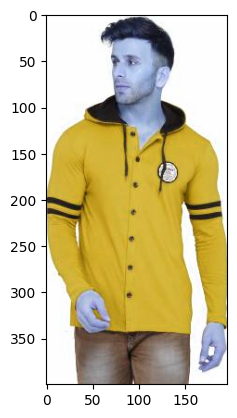

In [ ]:
test_img = cv2.imread('/content/{no.10509}.jpeg')
plt.imshow(test_img)


In [ ]:
test_img.shape

(400, 196, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
model.predict(test_input)

1/1 [==============================] - 1s 531ms/step


array([[1.]], dtype=float32)

In [ ]:
def predictImage(filename, model):
    img = image.load_img(filename,target_size=(256,256))
    plt.imshow(img)
    X = image.img_to_array(img)
    X = np.expand_dims(X,axis=0)
    val = model.predict(X)
    plt.ylabel("Letssee",fontsize = 20)
    print("vals is",val)
    if val == 1:
        plt.xlabel("No logo is there", fontsize=30)
    elif val == 0:
        plt.xlabel("Logo is there",fontsize=30)

1/1 [==============================] - 0s 71ms/step
vals is [[0.]]


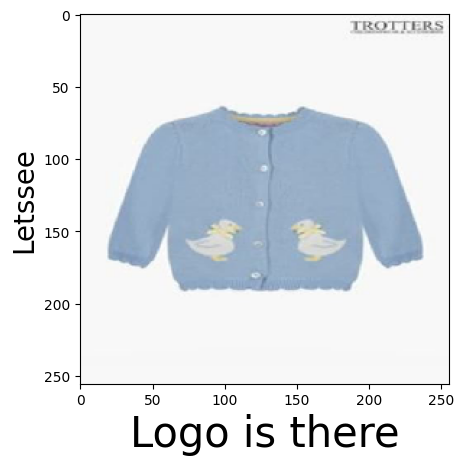

In [ ]:
path = "/content/{no.10604ab}.jpg"
predictImage(path, model)

1/1 [==============================] - 0s 126ms/step
vals is [[1.]]


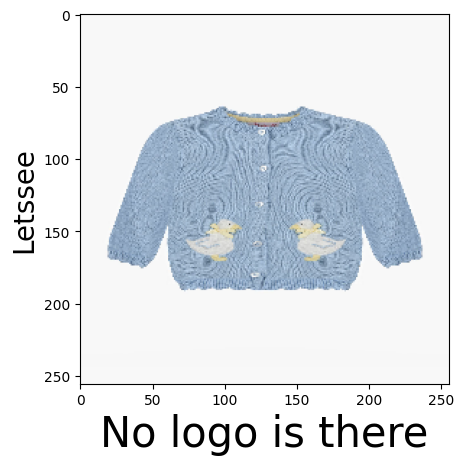

In [ ]:
path = "/content/{no.10604c}.jpg"
predictImage(path, model)